In [9]:
import comet_ml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [10]:
comet_api = comet_ml.api.API()

In [11]:
exps = comet_api.get('federated-learning/server-side-opt')

In [12]:
clrs = [float(exp.get_parameters_summary('CLIENT_LEARNING_RATE')['valueMax']) for exp in exps]
slrs = [float(exp.get_parameters_summary('SERVER_LEARNING_RATE')['valueMax']) for exp in exps]
sopts = [exp.get_parameters_summary('SERVER_OPT')['valueMax'] for exp in exps]
teas = [float(exp.get_metrics_summary('test_acc')['valueMax']) for exp in exps]
ids = [exp.id for exp in exps]
groupnorm = ['groupnorm' in exp.get_tags() for exp in exps]

In [13]:
df = pd.DataFrame({'id': ids, 'groupnorm': groupnorm, 'client lr': clrs, 'server lr': slrs, 'server opt': sopts, 'test_acc': teas})
# df_fin = df[df['test_acc'] > 99]
# [float(d['metricValue']) for d in exp.get_metrics('test_acc')]

In [14]:
# df.iloc[df.groupby(['server opt', 'server lr']).idxmax()['test_acc']]
# df.sort_values(['test_acc'], ascending=False)[['server lr', 'client lr', 'server opt', 'test_acc']]

In [15]:
df = df.sort_values(['server opt', 'server lr'])#[['server lr', 'client lr', 'server opt', 'test_acc']]

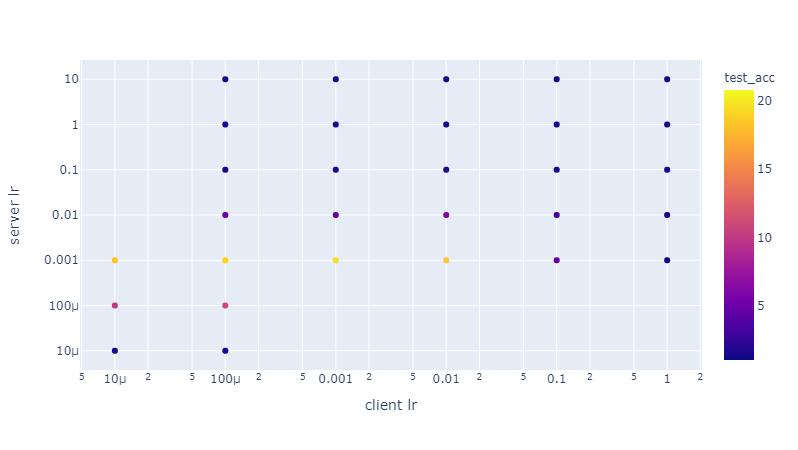

In [16]:
import plotly.express as px
import plotly.graph_objects as go
df_tmp = df[(df['server opt'] == 'Adam') & (df['groupnorm'] != True)]
import plotly.express as px
# df = px.data.gapminder()

fig = px.scatter(df_tmp, x="client lr", y="server lr", 
	         color="test_acc", log_x=True, log_y=True, size_max=60)
fig.show()
# fig = px.imshow(np.array(df_tmp['test_acc']).reshape((5,5)),
#                                 x=[str(s) for s in df_tmp['client lr'].unique()],
#                                 y=[str(s) for s in df_tmp['server lr'].unique()],
#          )
# fig.show()